In [1]:
# Load needed packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Experiment 2 (data processing, continued)
lines = [line.rstrip('\n') for line in open('experiment_results/experiment2.txt')]

Guard_time_points = []
Sensor_time_points = []
Camera_time_points = []
Smartwatch_time_points = []

recv_sensitive_from_Smartwatch_time_points = []
send_to_Guard_time_points = []
recv_encrypted_from_Guard_time_points = []

parsed_lines = [line for line in lines if (line[0:15]=='Receiving:'.rjust(15) or line[0:15]=='Sending:'.rjust(15))]
for line in parsed_lines:
    if len(line) > 70:
        IoT_device_name = line[72:]
        packet_time = float(line[25:48])
        packet_status = line[60:69]
        action = line[0:15]

        if IoT_device_name == 'Sensor':
            Sensor_time_points.append(packet_time)
        elif IoT_device_name == 'Camera':
            Camera_time_points.append(packet_time)
        elif IoT_device_name == 'Guard':
            if packet_status == 'ENCRYPTED':
                recv_encrypted_from_Guard_time_points.append(packet_time)
            else:
                Guard_time_points.append(packet_time)
        elif IoT_device_name == 'Smartwatch':
            if packet_status == 'SENSITIVE':
                recv_sensitive_from_Smartwatch_time_points.append(packet_time)
            else:
                Smartwatch_time_points.append(packet_time)
        else:
            send_to_Guard_time_points.append(packet_time)
        
min_val = Guard_time_points[0]
        
Guard_time_points = np.array(Guard_time_points) - min_val
Camera_time_points = np.array(Camera_time_points) - min_val
Sensor_time_points = np.array(Sensor_time_points) - min_val
Smartwatch_time_points = np.array(Smartwatch_time_points) - min_val

recv_sensitive_from_Smartwatch_time_points = np.array(recv_sensitive_from_Smartwatch_time_points) - min_val
send_to_Guard_time_points = np.array(send_to_Guard_time_points) - min_val
recv_encrypted_from_Guard_time_points = np.array(recv_encrypted_from_Guard_time_points) - min_val

In [3]:
# Experiment 2 (define draw functions, continued)
def draw_single_traffic(time_points, title, color=None):
    height, width = 15, 5
    plt.figure(figsize=(height, width))
    ones = np.ones(len(time_points))
    plt.bar(time_points, ones, color=color, width=0.5) 
    plt.title(title)
    plt.xlabel('Time (sec)')
    plt.yticks([])
    plt.xlim(0, 300)
    plt.show()
    
def draw_combined_traffic():
    # Combined traffic at the middlebox
    height, width = 15, 5
    plt.figure(figsize=(height, width))
    
    ones = np.ones(len(recv_sensitive_from_Smartwatch_time_points))
    plt.bar(recv_sensitive_from_Smartwatch_time_points, ones, width=0.5) 
    ones = np.ones(len(send_to_Guard_time_points))
    plt.bar(send_to_Guard_time_points, ones, color='orange', width=0.5) 
    ones = np.ones(len(recv_encrypted_from_Guard_time_points))
    plt.bar(recv_encrypted_from_Guard_time_points, ones, color='g', width=0.5) 
    
    plt.title('TYPE 2: Guard encryption')
    plt.xlabel('Time (sec)')
    plt.yticks([])
    plt.show()

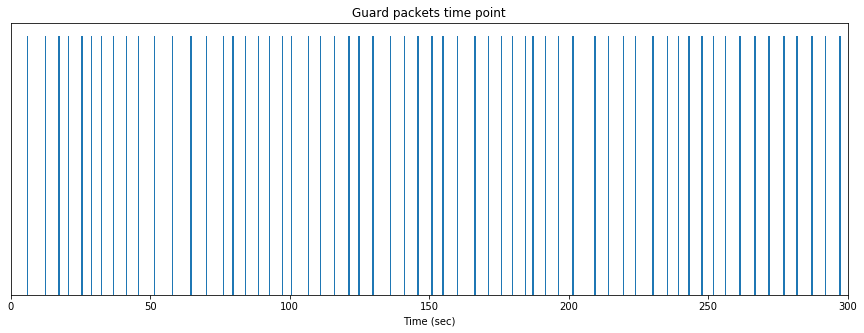

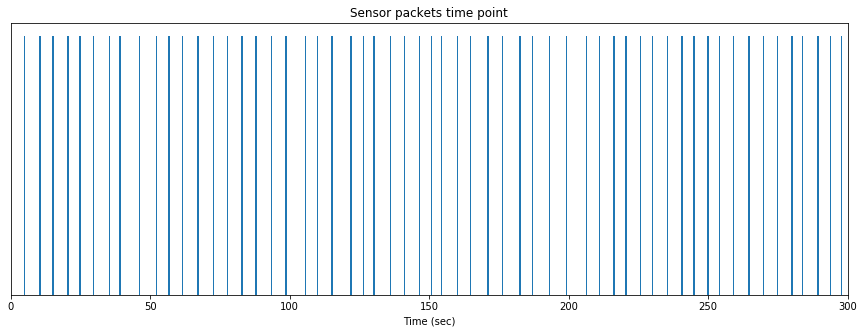

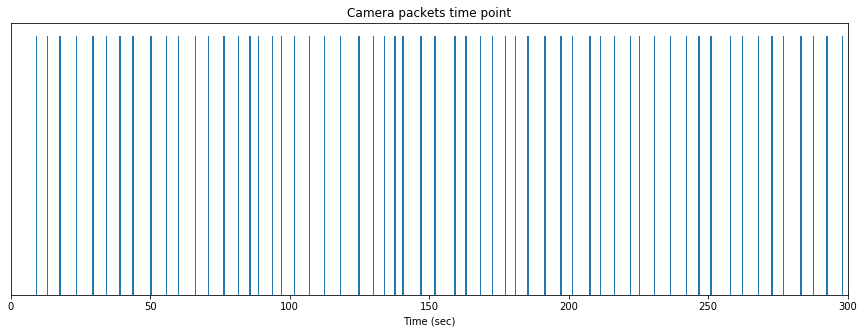

In [4]:
# Experiment 2 (visualize, continued)
draw_single_traffic(Guard_time_points, 'Guard packets time point', None)
draw_single_traffic(Sensor_time_points, 'Sensor packets time point', None) 
draw_single_traffic(Camera_time_points, 'Camera packets time point', None)

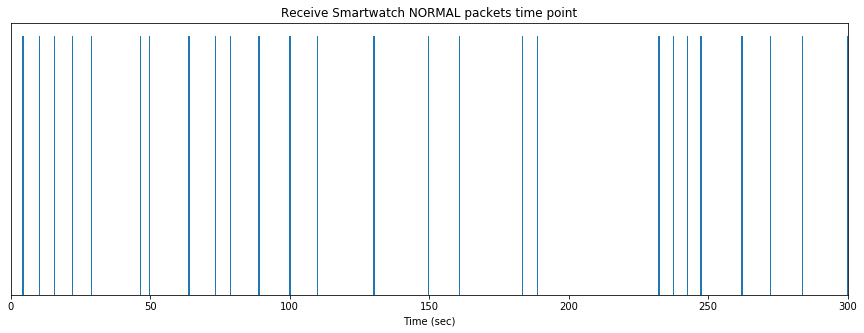

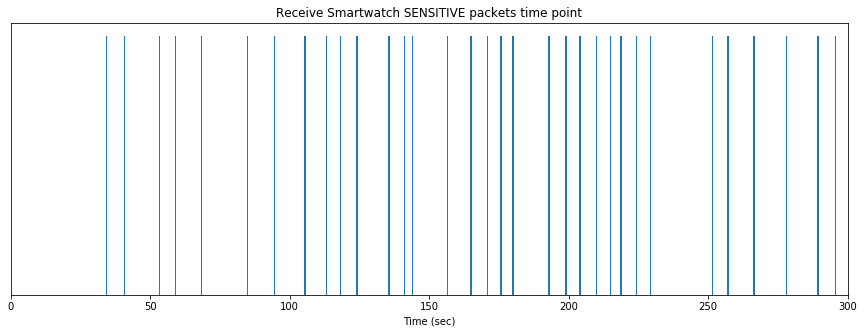

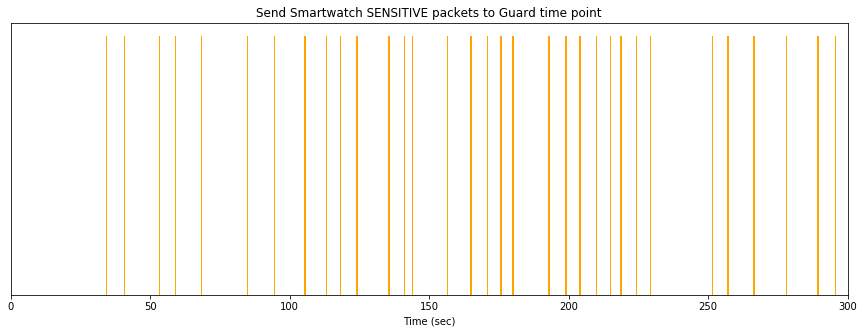

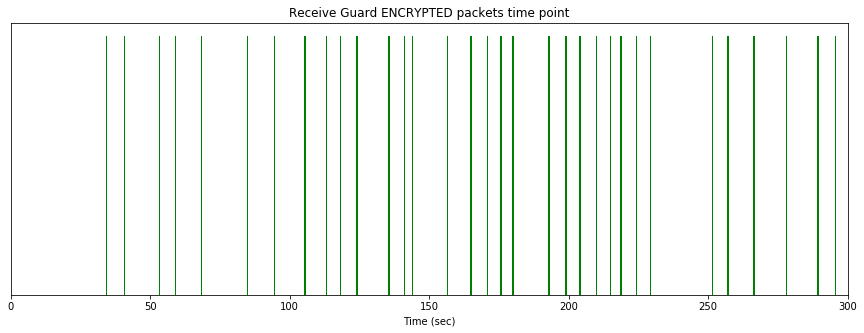

In [5]:
# Experiment 2 (visualize, continued)
draw_single_traffic(Smartwatch_time_points, 'Receive Smartwatch NORMAL packets time point', None)
draw_single_traffic(recv_sensitive_from_Smartwatch_time_points, 'Receive Smartwatch SENSITIVE packets time point', None)
draw_single_traffic(send_to_Guard_time_points, 'Send Smartwatch SENSITIVE packets to Guard time point', 'orange')
draw_single_traffic(recv_encrypted_from_Guard_time_points, 'Receive Guard ENCRYPTED packets time point', 'g')

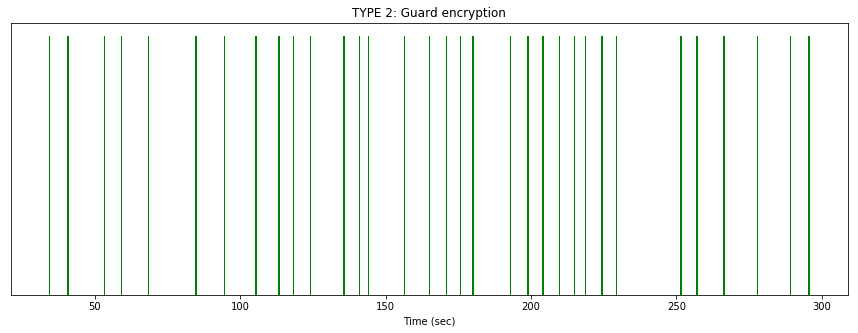

In [6]:
# Experiment 2 (visualize, continued)
draw_combined_traffic()